In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('datas.csv', sep=';')
data.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,"9839,64",C1231006815,170136,"160296,36",M1979787155,0,0,0
1,1,1,PAYMENT,"1864,28",C1666544295,21249,"19384,72",M2044282225,0,0,0
2,2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
4,4,1,PAYMENT,"11668,14",C2048537720,41554,"29885,86",M1230701703,0,0,0


In [6]:
data['isFraud'].value_counts()

isFraud
0    1000000
1       8213
Name: count, dtype: int64

In [7]:
data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].replace({',': '.'}, regex=True)
data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].astype(float)


In [8]:
data.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
le = LabelEncoder()

data['nameOrig'] = le.fit_transform(data['nameOrig'])
data['nameDest'] = le.fit_transform(data['nameDest'])
data['type'] = le.fit_transform(data['type'])

In [10]:
data.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,3,9839.64,120332,170136.0,160296.36,266989,0.0,0.0,0
1,1,1,3,1864.28,347441,21249.0,19384.72,278017,0.0,0.0,0
2,2,1,4,181.00,158804,181.0,0.00,76697,0.0,0.0,1
3,3,1,1,181.00,924658,181.0,0.00,68272,21182.0,0.0,1
4,4,1,3,11668.14,546218,41554.0,29885.86,139207,0.0,0.0,0


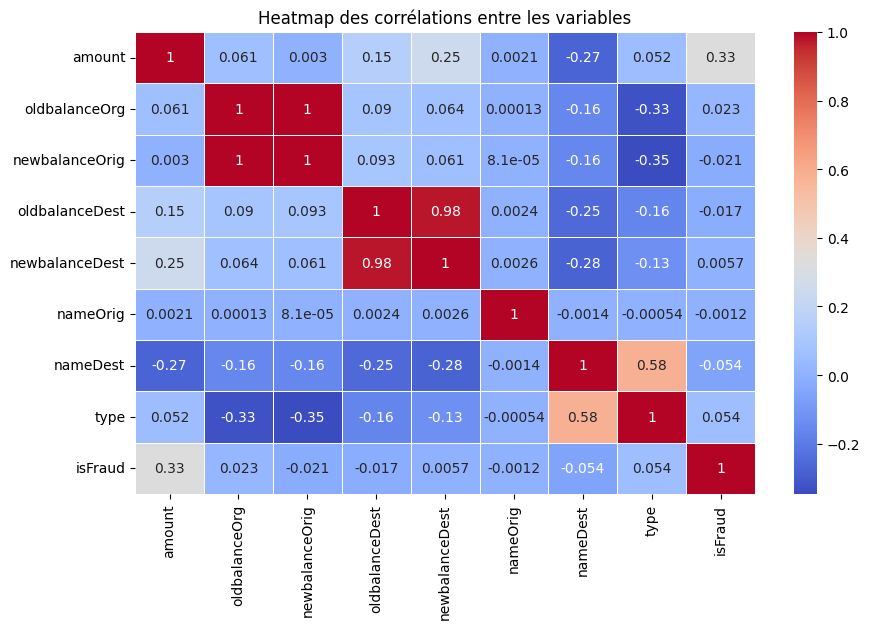

In [12]:
correlation_matrix = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest', 'type', 'isFraud']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap des corrélations entre les variables")
plt.show()

In [9]:
# pd.plotting.scatter_matrix(data)

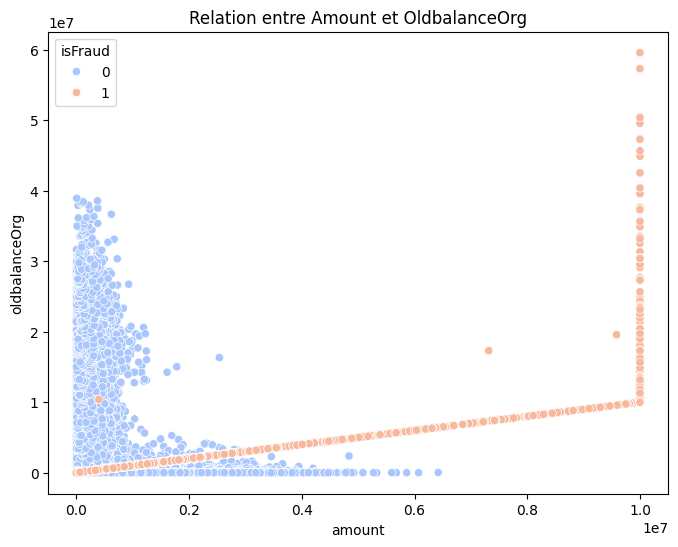

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='amount', y='oldbalanceOrg', hue='isFraud', palette='coolwarm')
plt.title('Relation entre Amount et OldbalanceOrg')
plt.show()

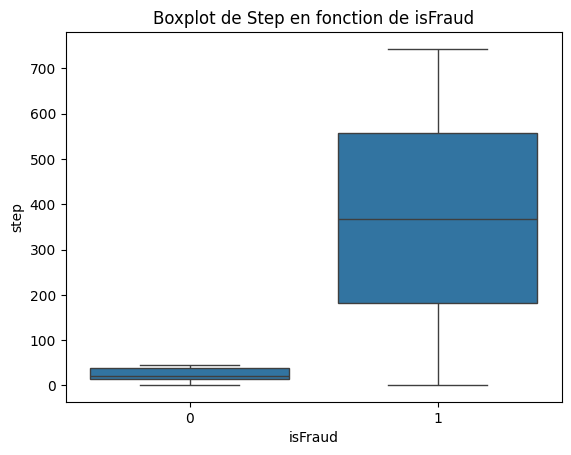

In [11]:
sns.boxplot(x='isFraud', y='step', data=data)
plt.title('Boxplot de Step en fonction de isFraud')
plt.show()

In [33]:
data.head(50)

,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFraud
2,4,181.00,158804,181.00,76697,0.00,1
3,1,181.00,924658,181.00,68272,0.00,1
15,1,229133.94,958286,15325.00,72734,51513.44,0
19,4,215310.30,349707,705.00,5171,0.00,0
24,4,311685.89,512502,10835.00,96416,2719172.89,0
42,1,110414.71,887016,26845.41,26114,2415.16,0
47,1,56953.90,297253,1942.02,90782,64106.18,0
48,1,5346.89,753127,0.00,60996,6453430.91,0
51,1,23261.30,558479,20411.53,51609,0.00,0
58,4,62610.80,508380,79114.00,48386,8383.29,0


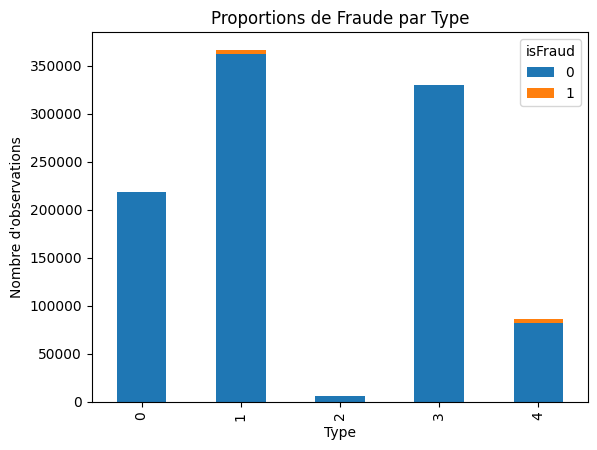

In [12]:
df_grouped = data.groupby(['type', 'isFraud']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.title('Proportions de Fraude par Type')
plt.xlabel('Type')
plt.ylabel('Nombre d\'observations')
plt.show()

In [13]:
count_by_type = data.groupby('type').size()
print(count_by_type)

type
0    218938
1    366632
2      6475
3    329867
4     86301
dtype: int64


In [14]:
data.groupby(data['step']<45)['isFraud'].sum()

step
False    7694
True      519
Name: isFraud, dtype: int64

In [15]:
for step_value in sorted(data['step'].unique()):
    subset = data[data['step'] >= step_value]
    if subset['isFraud'].sum() == len(subset): 
        print(f"Le seuil de 'step' où toutes les valeurs de 'isFraud' sont égales à 1 : {step_value}")
        break

Le seuil de 'step' où toutes les valeurs de 'isFraud' sont égales à 1 : 46


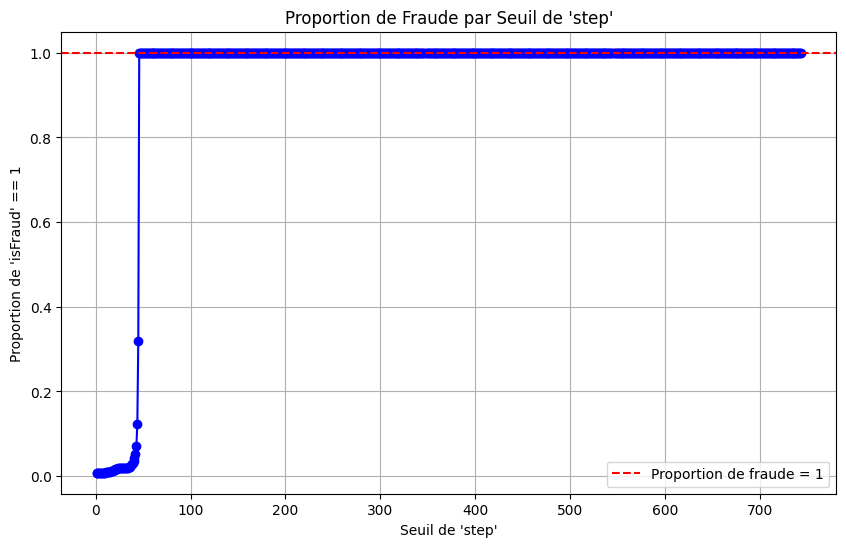

In [16]:
# Calcul de la proportion de valeurs 'isFraud' égales à 1 pour chaque seuil de 'step'
step_thresholds = sorted(data['step'].unique())
fraud_proportions = []

for step_value in step_thresholds:
    subset = data[data['step'] >= step_value]
    fraud_proportion = subset['isFraud'].mean()  # Moyenne de 'isFraud' donne la proportion de 1
    fraud_proportions.append(fraud_proportion)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(step_thresholds, fraud_proportions, marker='o', linestyle='-', color='b')
plt.axhline(1, color='r', linestyle='--', label="Proportion de fraude = 1")
plt.title("Proportion de Fraude par Seuil de 'step'")
plt.xlabel("Seuil de 'step'")
plt.ylabel("Proportion de 'isFraud' == 1")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
data = data.drop(columns = ['newbalanceOrig', 'oldbalanceDest', 'transactionId', 'step'])

In [19]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFraud
0,3,9839.64,120332,170136.0,266989,0.0,0
1,3,1864.28,347441,21249.0,278017,0.0,0
2,4,181.00,158804,181.0,76697,0.0,1
3,1,181.00,924658,181.0,68272,0.0,1
4,3,11668.14,546218,41554.0,139207,0.0,0


In [20]:
indices_to_drop = data.index[data['type'] == 0]
print(len(indices_to_drop))
data = data.drop(indices_to_drop, axis=0).reset_index(drop=True)


218938


In [21]:
indices_to_drop = data.index[data['type'] == 2]
print(len(indices_to_drop))
data = data.drop(indices_to_drop, axis=0)

6475


In [22]:
indices_to_drop = data.index[data['type'] == 3]
print(len(indices_to_drop))
data = data.drop(indices_to_drop, axis=0)

329867


In [23]:
x = data[['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest', 'newbalanceDest']]
y = data['isFraud']

In [24]:
x.describe()

,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest
count,452933.000000,4.529330e+05,4.529330e+05,4.529330e+05,452933.000000,4.529330e+05
mean,1.571614,2.886999e+05,5.041269e+05,8.487974e+04,50038.982434,1.824025e+06
std,1.178178,4.879580e+05,2.908052e+05,5.552064e+05,28883.890717,2.867881e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,8.679566e+04,2.526230e+05,0.000000e+00,25022.000000,3.285653e+05
50%,1.000000,1.791355e+05,5.040810e+05,5.120000e+02,50119.000000,8.557574e+05
75%,1.000000,3.210030e+05,7.558290e+05,3.855939e+04,74973.000000,2.090113e+06
max,4.000000,1.000000e+07,1.007966e+06,5.958504e+07,99879.000000,2.367265e+08


In [25]:
y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [26]:
scaler = StandardScaler()

x_array = scaler.fit_transform(x)

In [27]:
print(x)

        type      amount  nameOrig  oldbalanceOrg  nameDest  newbalanceDest
2          4      181.00    158804         181.00     76697            0.00
3          1      181.00    924658         181.00     68272            0.00
15         1   229133.94    958286       15325.00     72734        51513.44
19         4   215310.30    349707         705.00      5171            0.00
24         4   311685.89    512502       10835.00     96416      2719172.89
...      ...         ...       ...            ...       ...             ...
789270     1   339682.13    896539      339682.13     88260       339682.13
789271     4  6311409.28    275679     6311409.28     45456            0.00
789272     1  6311409.28     84897     6311409.28     18766      6379898.11
789273     4   850002.52    357474      850002.52     55727            0.00
789274     1   850002.52    145840      850002.52     93315      7360101.63

[452933 rows x 6 columns]


In [28]:
x = pd.DataFrame(x_array, columns=x.columns)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x_train.head(10)

,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest
76383,2.061139,3.084326,-0.309455,-0.144189,-1.328527,0.819673
177714,-0.485169,0.334461,-1.499878,-0.152880,0.884508,-0.352046
323669,-0.485169,0.362415,0.281182,-0.027512,0.133120,-0.398887
187270,-0.485169,-0.344842,0.969568,-0.152880,0.672729,-0.258503
174947,-0.485169,-0.053635,-0.464404,-0.152880,-1.004817,0.283294
233859,-0.485169,-0.386068,1.095501,-0.152880,1.130286,-0.261232
148324,-0.485169,0.021340,-0.996836,-0.060710,-0.580254,0.179569
40944,-0.485169,-0.270536,-0.905105,0.207610,-0.292239,-0.416950
143717,2.061139,1.481087,1.093166,0.405169,0.652614,-0.171047
139108,-0.485169,-0.053550,0.482107,-0.004971,-1.328423,-0.344614


# // SMOTE

In [31]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

x_train, y_train = smote.fit_resample(x_train, y_train)

In [36]:
y_train.value_counts()

x_train.value_counts()

type       amount      nameOrig   oldbalanceOrg  nameDest   newbalanceDest
 2.061139   19.901942   1.727935   45.981806      0.798994  -0.636019         1
-0.485169  -0.591650   -1.560895  -0.152880      -0.855702  -0.555719         1
                       -1.206750  -0.152880      -1.155316   2.143307         1
                       -1.190496  -0.152880       1.547509  -0.172794         1
                       -0.907701  -0.152880      -1.053356  -0.598438         1
                                                                             ..
                        1.432435  -0.152880      -0.910439  -0.609253         1
           -0.591649    1.616108  -0.107794      -1.107850  -0.636019         1
           -0.591646    0.539792  -0.152880       0.126126  -0.611579         1
           -0.591639    0.058878  -0.152880      -0.174353   1.038382         1
           -0.591634    0.993715  -0.152880       0.176016  -0.620950         1
Name: count, Length: 362346, dtype: int64

In [37]:
x_train.to_csv('x_train.csv', index=False, sep=';')
x_test.to_csv('x_test.csv', index=False, sep=';')
y_train.to_csv('y_train.csv', index=False, sep=';')
y_test.to_csv('y_test.csv', index=False, sep=';')


In [38]:
x_train.value_counts()

type       amount      nameOrig   oldbalanceOrg  nameDest   newbalanceDest
 2.061139   19.901942   1.727935   45.981806      0.798994  -0.636019         1
-0.485169  -0.591650   -1.560895  -0.152880      -0.855702  -0.555719         1
                       -1.206750  -0.152880      -1.155316   2.143307         1
                       -1.190496  -0.152880       1.547509  -0.172794         1
                       -0.907701  -0.152880      -1.053356  -0.598438         1
                                                                             ..
                        1.432435  -0.152880      -0.910439  -0.609253         1
           -0.591649    1.616108  -0.107794      -1.107850  -0.636019         1
           -0.591646    0.539792  -0.152880       0.126126  -0.611579         1
           -0.591639    0.058878  -0.152880      -0.174353   1.038382         1
           -0.591634    0.993715  -0.152880       0.176016  -0.620950         1
Name: count, Length: 362346, dtype: int64

In [40]:
y_train.value.counts()

AttributeError: 'Series' object has no attribute 'value'